# Prophet model
Prophet model is already trained and saved. Code is preset to inference/prediction mode. To train the model, go to `prophet_model.config.CFG` and change the value of train from `train=False` to `train=True`

In [37]:
from prophet_model.main import main

wandb: Currently logged in as: michael_kingston. Use `wandb login --relogin` to force relogin


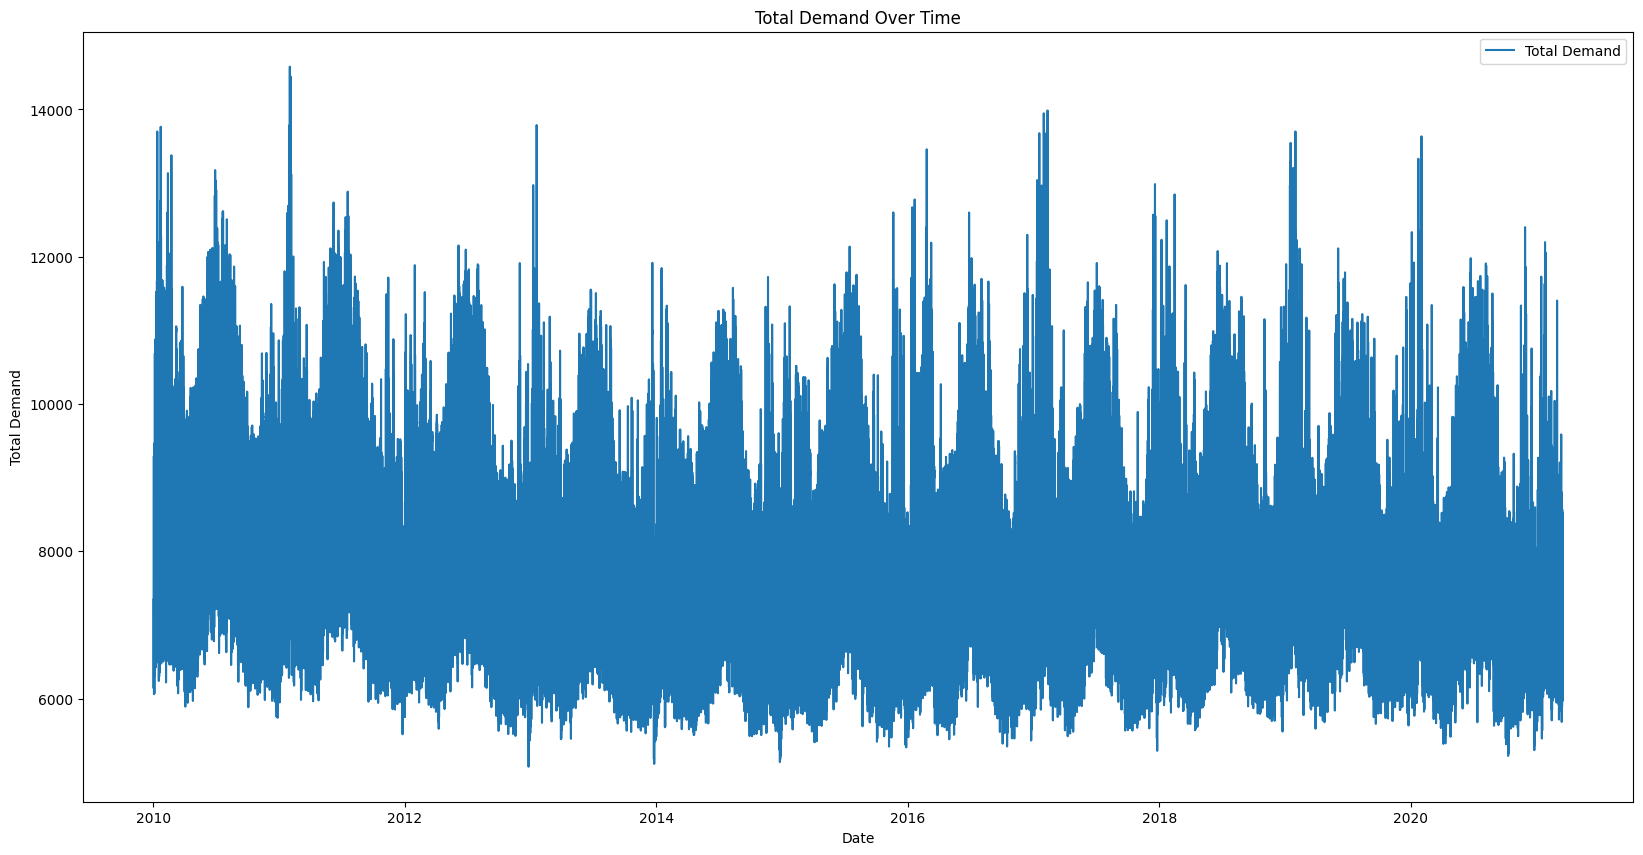

0      7052.776045
1      6866.064710
2      6613.413778
3      6414.517879
4      6302.332062
          ...     
331    7338.319313
332    7290.214219
333    7200.726004
334    7074.300188
335    6985.039974
Name: yhat, Length: 336, dtype: float64
196128   2021-03-11 00:30:00
196129   2021-03-11 01:00:00
196130   2021-03-11 01:30:00
196131   2021-03-11 02:00:00
196132   2021-03-11 02:30:00
                 ...        
196459   2021-03-17 22:00:00
196460   2021-03-17 22:30:00
196461   2021-03-17 23:00:00
196462   2021-03-17 23:30:00
196463   2021-03-18 00:00:00
Name: ds, Length: 336, dtype: datetime64[ns] 196128    7047.49
196129    6824.60
196130    6539.74
196131    6367.79
196132    6223.81
           ...   
196459    7419.77
196460    7417.91
196461    7287.32
196462    7172.39
196463    7094.51
Name: y, Length: 336, dtype: float64


/home/noone/.cache/pypoetry/virtualenvs/team-0-5QTAbJ9E-py3.12/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/noone/.cache/pypoetry/virtualenvs/team-0-5QTAbJ9E-py3.12/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


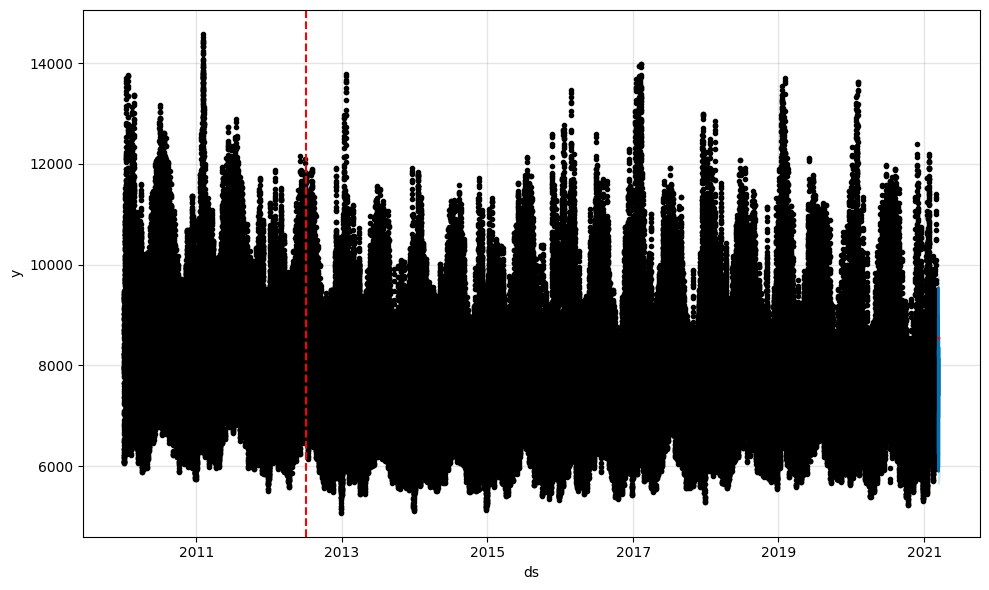

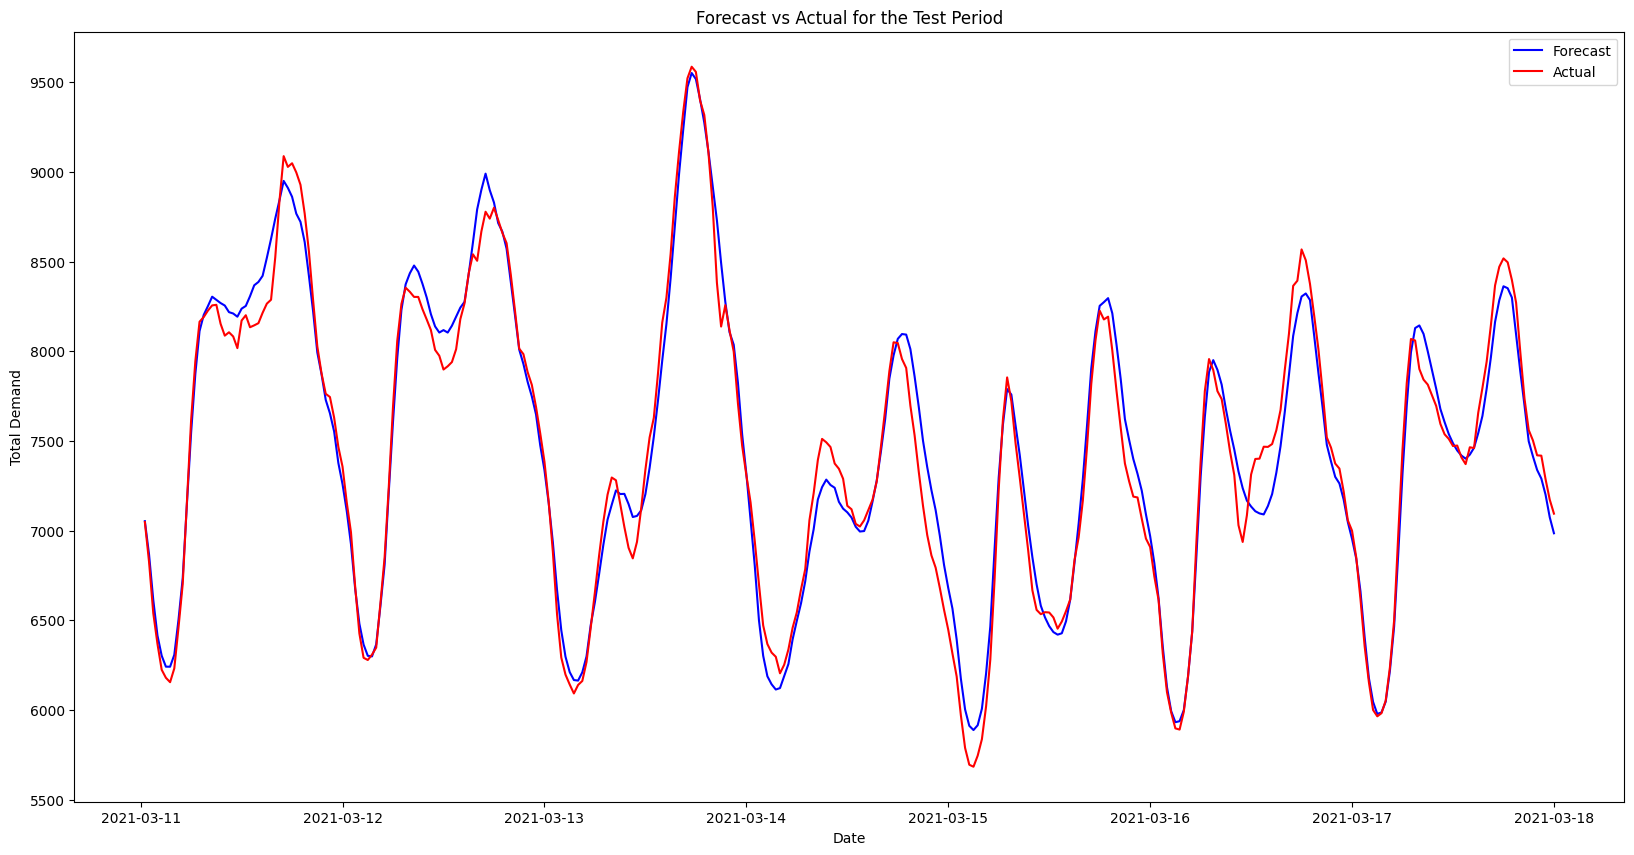

/home/noone/.cache/pypoetry/virtualenvs/team-0-5QTAbJ9E-py3.12/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/noone/.cache/pypoetry/virtualenvs/team-0-5QTAbJ9E-py3.12/lib/python3.12/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/home/noone/.cache/pypoetry/virtualenvs/team-0-5QTAbJ9E-py3.12/lib/python3.12/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is

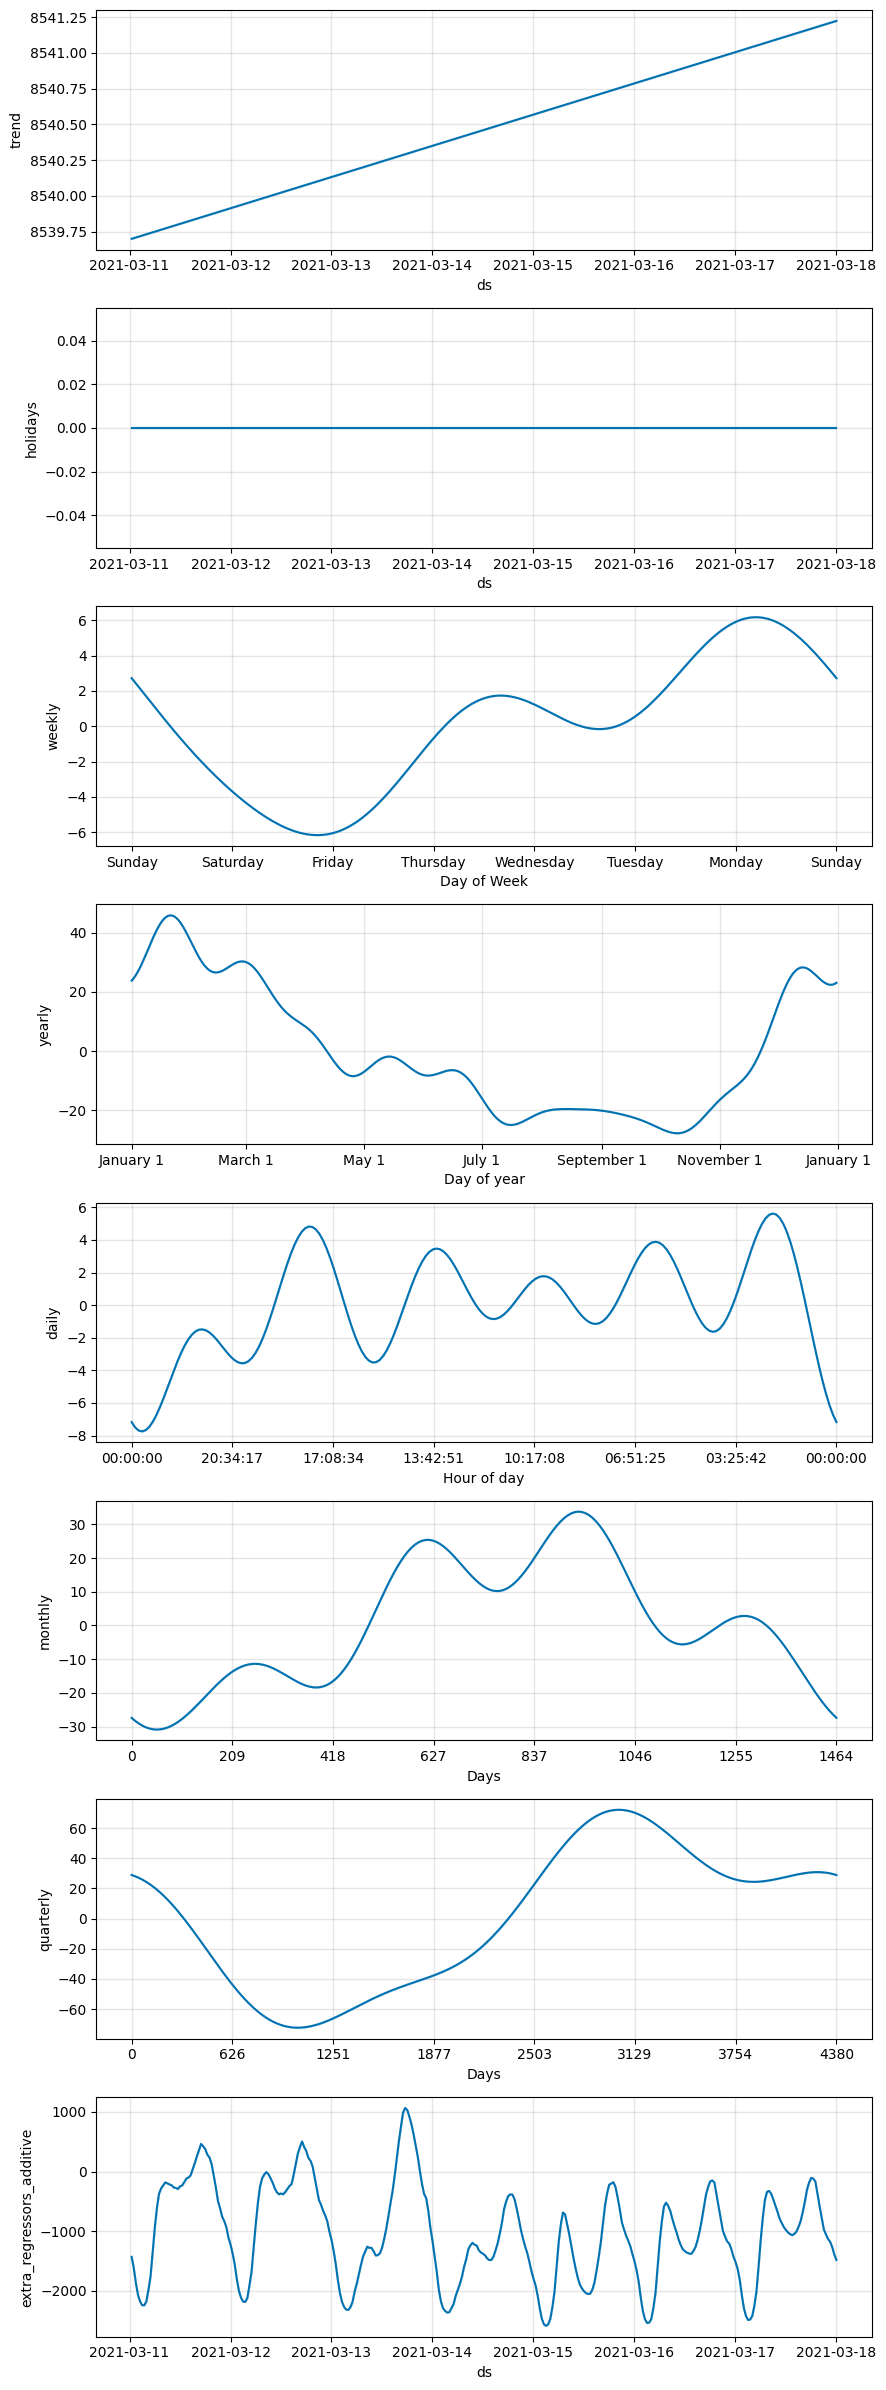

                   ds        y         yhat
0 2021-03-11 00:30:00  7047.49  7052.776045
1 2021-03-11 01:00:00  6824.60  6866.064710
2 2021-03-11 01:30:00  6539.74  6613.413778
3 2021-03-11 02:00:00  6367.79  6414.517879
4 2021-03-11 02:30:00  6223.81  6302.332062


In [38]:
main()
# todo: refactor to plot one plot per cell

# XGBoost model
Set to 'Prediction' mode, making predictions from a saved model. 

To change to 'train' mode, go to `xgb_model.config.CFG` and change the value of train from `train=False` to `train=True` 

In [39]:
from xgb_model.main import main
from xgb_model.visualisation import (initialize_shap_explainer, prepare_shap_explanations, plot_dependence_plots, plot_shap_summary, plot_waterfall_plot, plot_shap_values, plot_beeswarm_plot, plot_decision_plot, plot_actual_vs_predicted, plot_feature_importance)

Initialise the model, validation set and predictions

In [40]:
model, dval, valy, valX, val_predictions = main()

Validation MAE: 113.22132925984326
Validation MAE: 113.22132925984326


In [41]:
explainer, shap_values = initialize_shap_explainer(model, dval)
explainer, explanation = prepare_shap_explanations(model, valX)  # fix_me

In [42]:
print("Shape of valX before plotting:", valX.shape)

Shape of valX before plotting: (327, 135)


# plot of actual TOTALDEMAND values vs forecast values

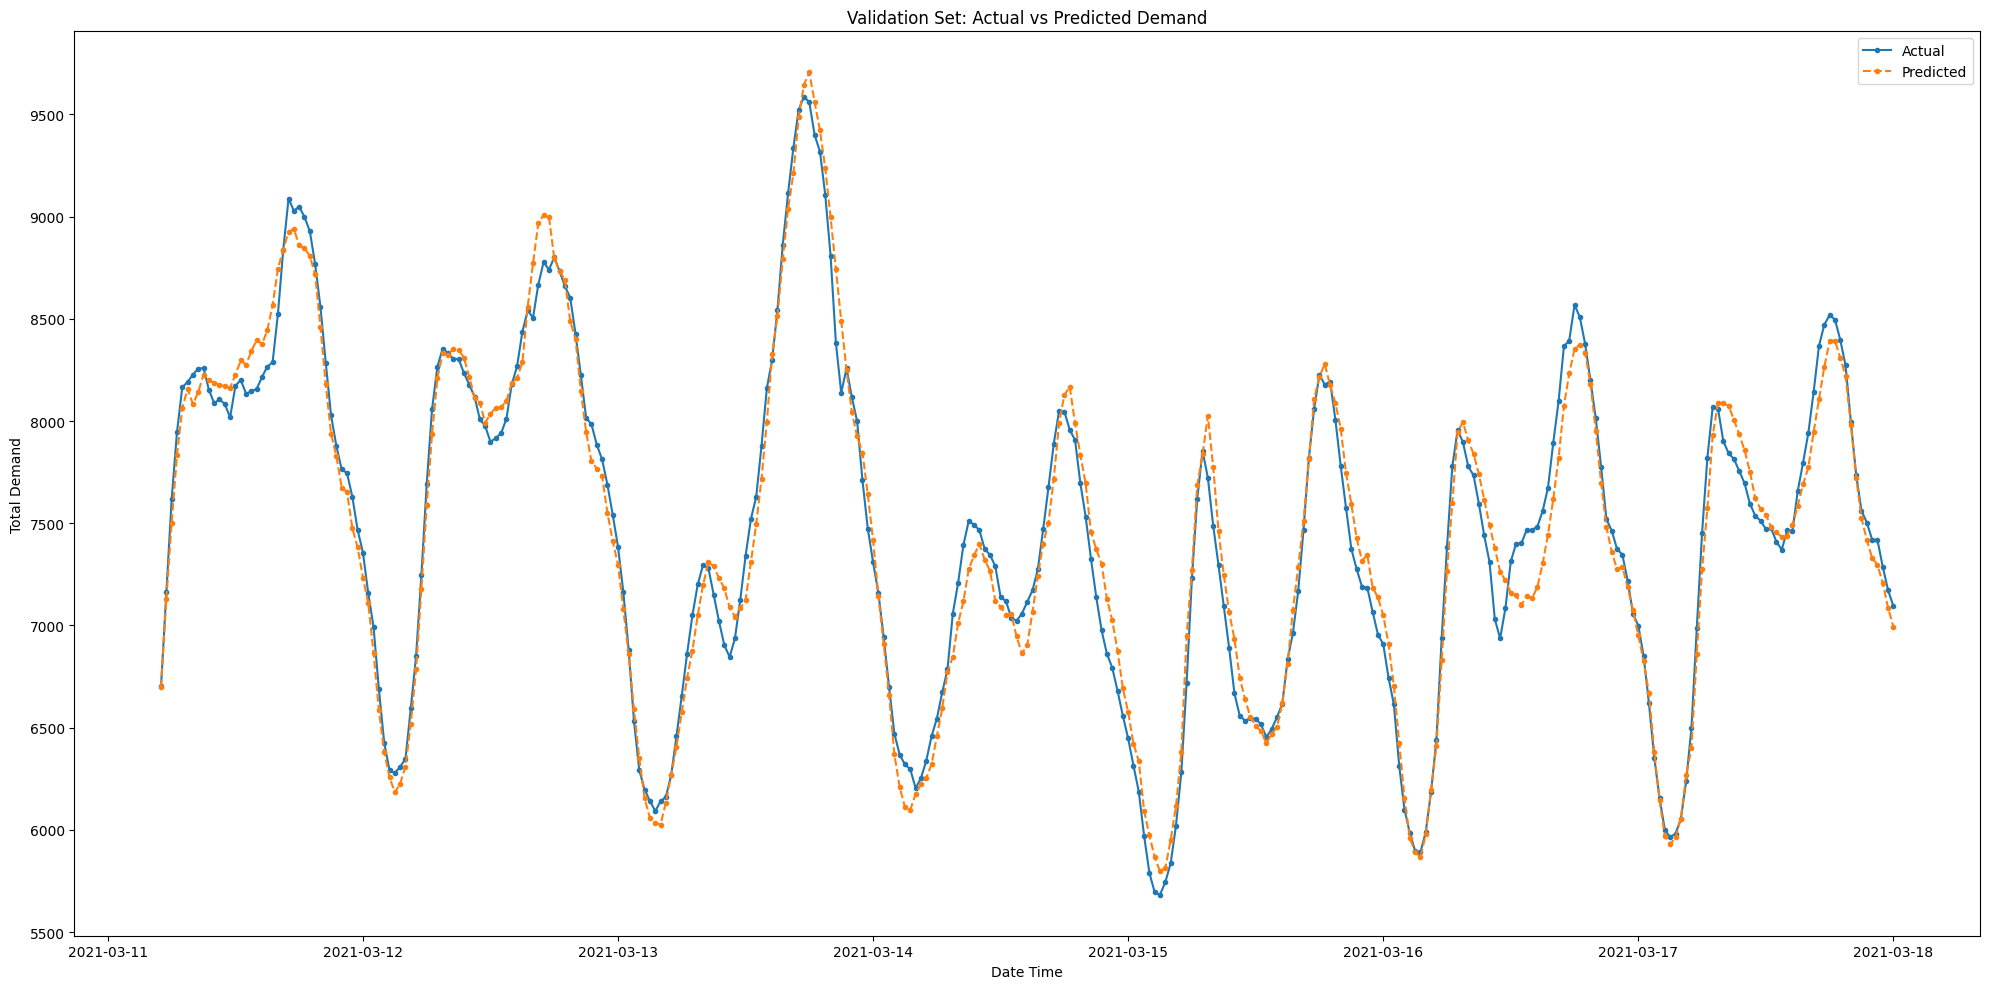

In [43]:
dates = valX.index
plot_actual_vs_predicted(
    dates,
    valy,
    val_predictions,
    'validation_actual_vs_predicted.png'
)

# shap summary plot

In [44]:
plot_shap_summary(
    explainer,
    valX,
    image_name='SHAP summary.png'
)

# plot SHAP values

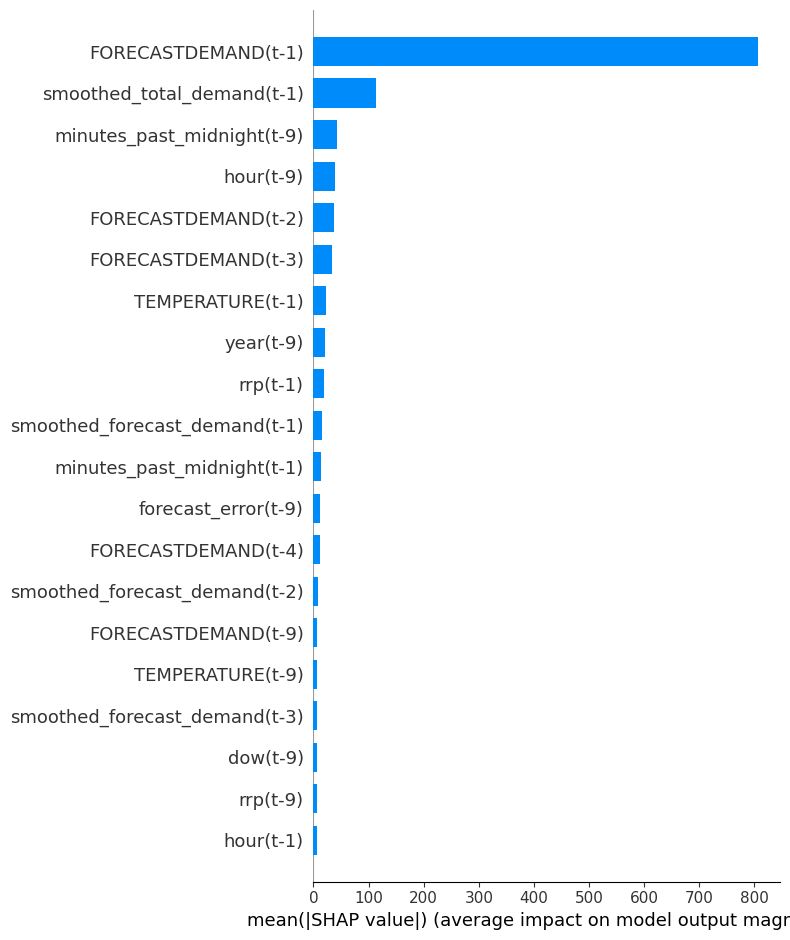

In [45]:
plot_shap_values(
    explainer,
    valX,
    'SHAP Values.png'
)

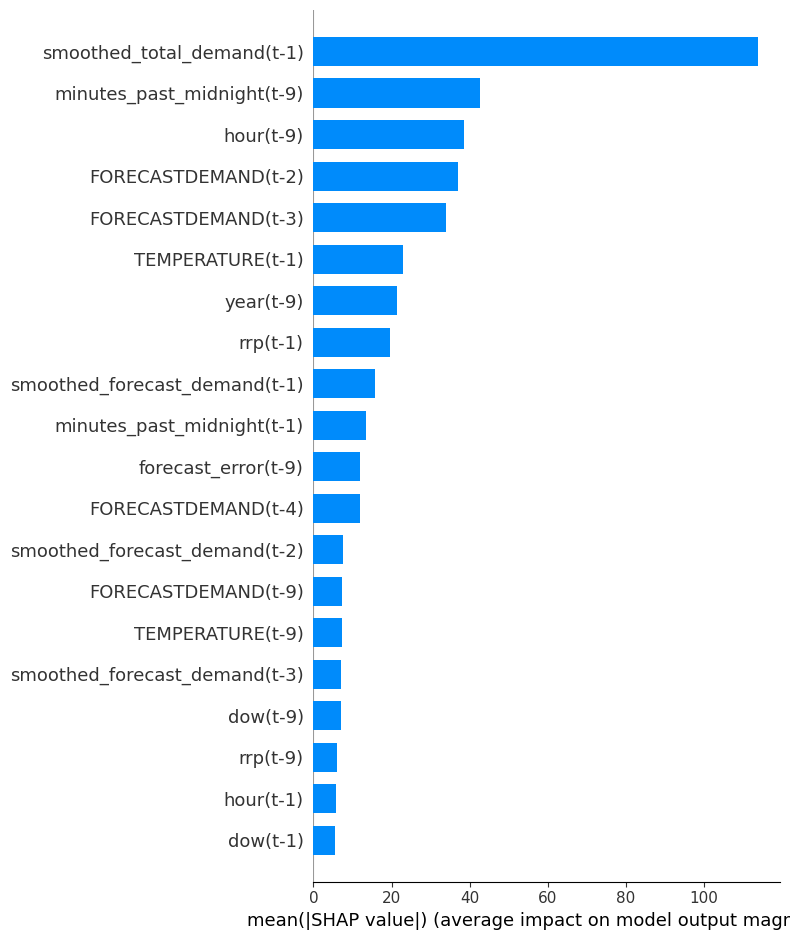

In [46]:
plot_shap_values(
    explainer,
    valX,
    feature_to_exclude='FORECASTDEMAND(t-1)',
    image_name='SHAP values excluding feature 0.png'
)

# Dependence plots for feature 1

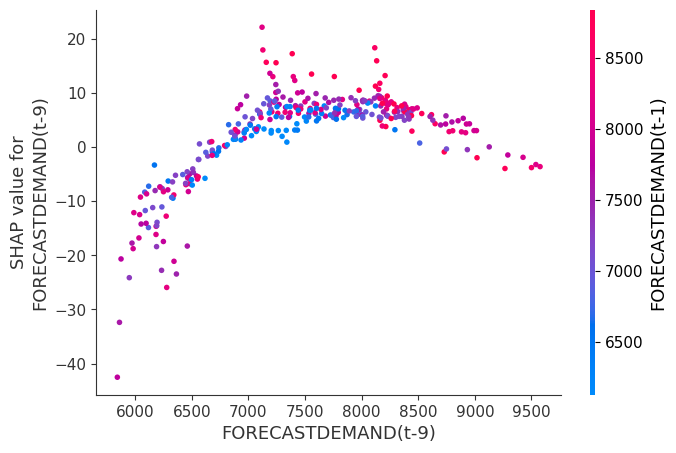

In [47]:
plot_dependence_plots(
    explainer,
    valX,
    feature_index=0,
    image_name="dependence_plot_feature_0.png"
)

# Dependence plots for feature 2

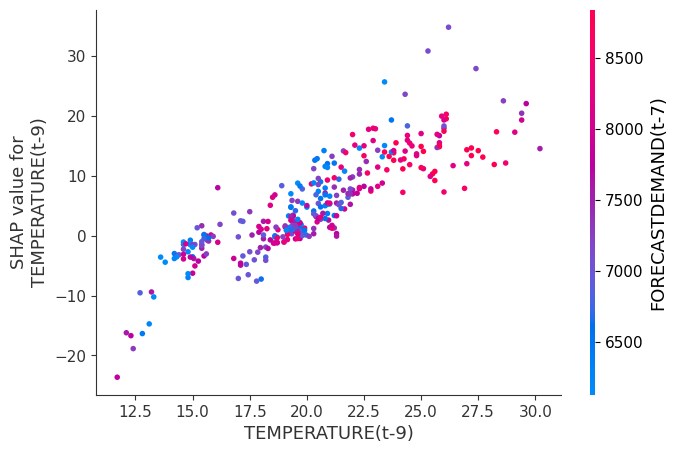

In [48]:
plot_dependence_plots(
    explainer,
    valX,
    feature_index=1,
    image_name='dependence_plot_feature_1.png'
)

# Decision Plot

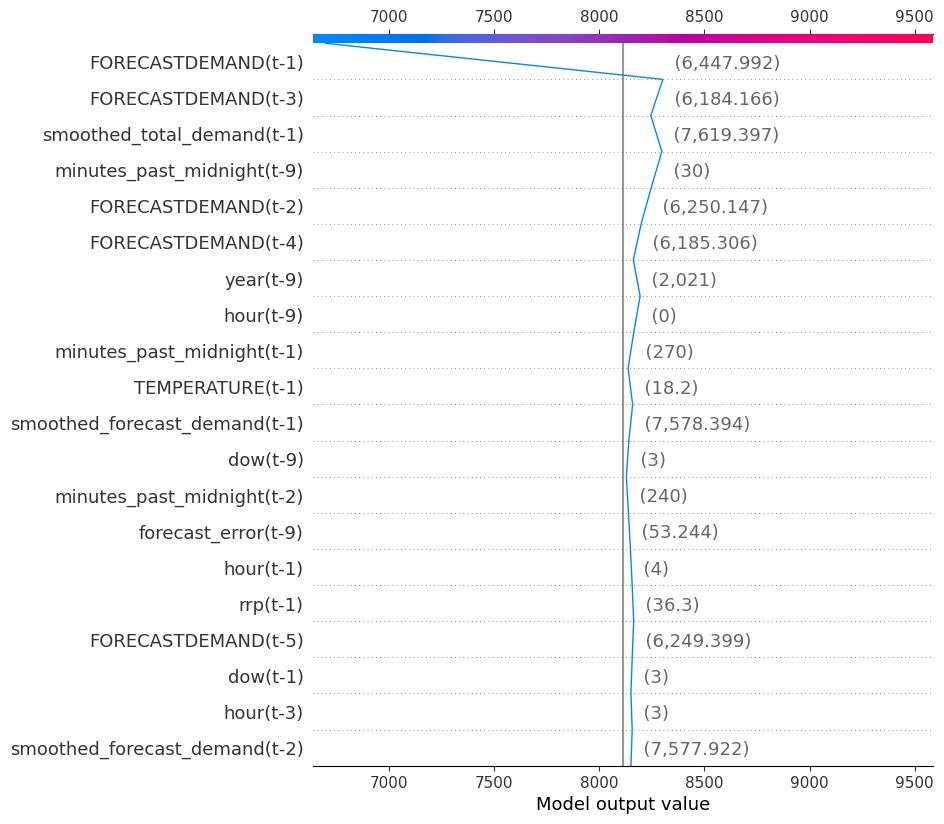

In [49]:
plot_decision_plot(
    explainer,
    valX,
    shap_values,
    instance_index=0,
    image_name='decision plot.png'
)

# Waterfall Plot

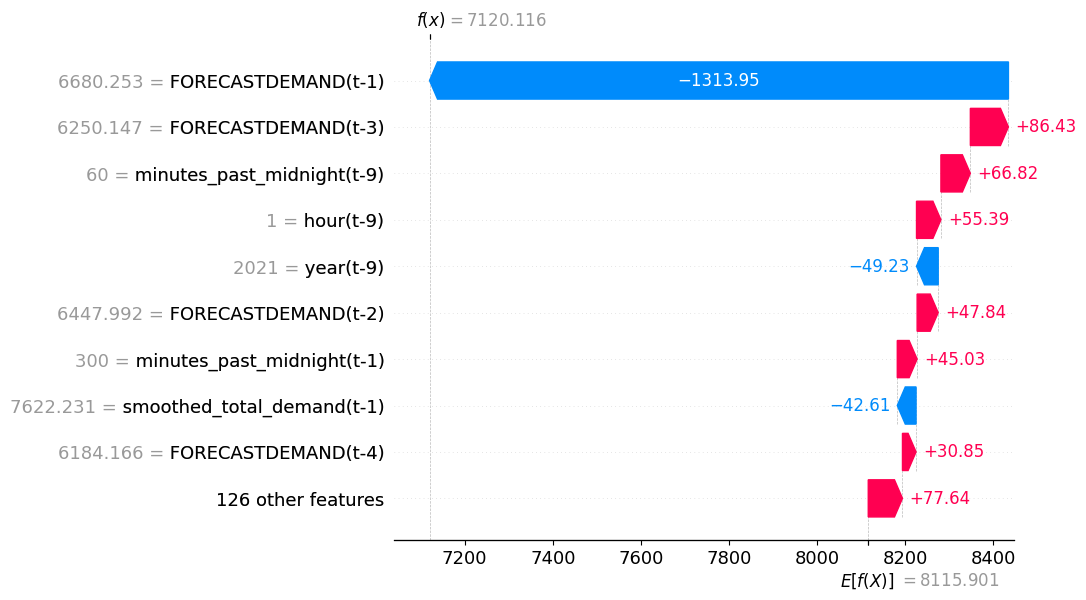

In [50]:
plot_waterfall_plot(
    explanation[1], 
    image_name='Waterfall Plot.png'
)

# Bee Swarm Plot

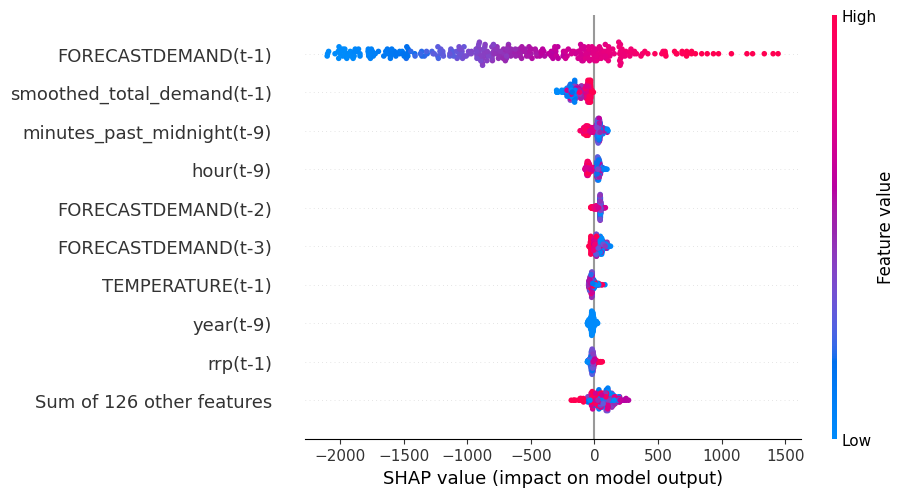

In [51]:
plot_beeswarm_plot(
    explanation,
    image_name='Bee Swarm Plot.png'
)

In [52]:
plot_feature_importance(
    model,
    'Feature Importance.png'
)  # fix_me:

# LSTM Model

In [53]:
# todo: refactor LSTM model